# Predicting used car prices

## Data cleaning

### Data discovery

In [1]:
import pandas as pd
import numpy as np

rows = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv", nrows=100)
rows.to_csv('original_data_chunk.csv', mode='w', header=True)

column_names = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv", nrows=1).head()
for column_name in column_names:
    print(column_name)

id
url
region
region_url
price
year
manufacturer
model
condition
cylinders
fuel
odometer
title_status
transmission
vin
drive
size
type
paint_color
image_url
description
county
state
lat
long


### Removing useless columns

In [2]:
columns = ["price", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "transmission", "drive", "size", "type", "paint_color"]
data = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv", nrows=100)
data = data[columns]
data.to_csv('sensible_column_data_chunk.csv', mode='w', header=True)

### Cleaning obvious outliers and rows with missing values of important columns

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def condition_match_percent(column, condition):    
    count = column.shape[0]
    con_match_count = column.query(condition).shape[0]
    match_percent = con_match_count * 100 / count
    print("   " + str(column.columns.values[0]) + "   ")
    print("total count: " + str(count))
    print("matching condition count: " + str(con_match_count))
    print("not matching condition count: " + str(count - con_match_count))
    print("matching condition percentage: " + str(match_percent))
    print("not matching condition percentage: " + str(100 - match_percent))

def missing_value_percentage(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_percentage = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_percentage.sort_values('percent_missing', inplace=True)
    print(missing_value_percentage)

def reject_outliers(data, column):
    u = np.median(data[column])
    s = np.std(data[column])
    top = u + 2 * s
    bottom = u - 2 * s
    return data.query("@bottom < {0} < @top".format(column), engine="python")

data = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv")
data = data[columns]

#### Removing "price" column obvious outliers and rows with missing "price" values

              percent_missing
price                0.000000
year                 0.182859
title_status         0.544688
fuel                 0.628614
transmission         0.736069
model                1.484551
manufacturer         4.369357
odometer            18.337073
type                27.321267
drive               28.859547
paint_color         32.280888
cylinders           40.480103
condition           43.732851
size                68.773101

   price   
total count: 539759
matching condition count: 482878
not matching condition count: 56881
matching condition percentage: 89.46177831217265
not matching condition percentage: 10.538221687827345


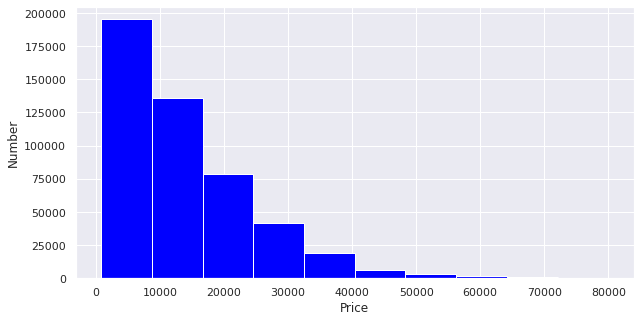

In [4]:
missing_value_percentage(data)
print()
condition_match_percent(data[["price"]], "100000 > price > 750")
#print("\n" + str(data["price"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Price")
plt.ylabel("Number")
plt.hist(data[["price"]].query("80000 > price > 800")["price"], bins=10, color='blue')
plt.show()
data = data.query("80000 > price > 0")

#### Removing "odometer" column obvious outliers and rows with missing "odometer" values

              percent_missing
price                0.000000
year                 0.186802
title_status         0.529240
fuel                 0.629218
transmission         0.683053
model                1.442811
manufacturer         4.214286
odometer            17.917851
type                27.567217
drive               28.870179
paint_color         31.828862
cylinders           39.722124
condition           41.668876
size                68.320903

   odometer   
total count: 494105
matching condition count: 400336
not matching condition count: 93769
matching condition percentage: 81.02245474140112
not matching condition percentage: 18.97754525859888


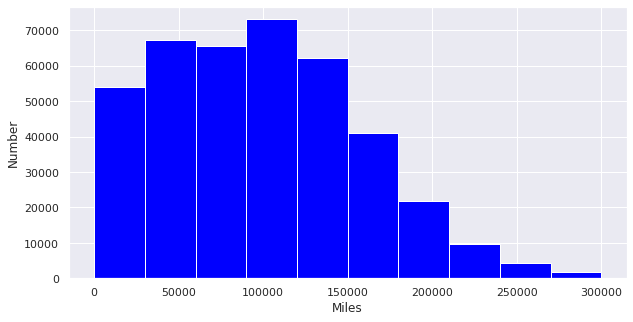

In [5]:

missing_value_percentage(data)
print()
condition_match_percent(data[["odometer"]], "300000 > odometer > 10")
#print("\n" + str(data["odometer"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Miles")
plt.ylabel("Number")
plt.hist(data[["odometer"]].query("300000 > odometer > 10")["odometer"], bins=10, color='blue')
plt.show()
data = data.query("300000 > odometer > 10")

#### Removing "year" column obvious outliers and rows with missing "year" values

              percent_missing
price                0.000000
odometer             0.000000
year                 0.224811
title_status         0.628472
fuel                 0.723892
transmission         0.792334
model                0.946955
manufacturer         3.157348
type                18.455248
drive               20.832001
paint_color         24.361536
cylinders           34.642400
condition           37.967357
size                66.093981

   year   
total count: 400336
matching condition count: 393472
not matching condition count: 6864
matching condition percentage: 98.28544023020663
not matching condition percentage: 1.714559769793368


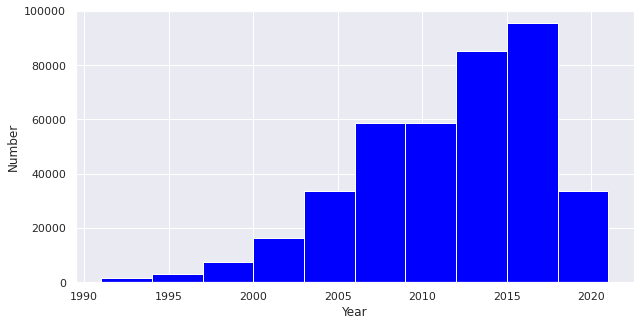

In [6]:
missing_value_percentage(data)
print()
condition_match_percent(data[["year"]], "year > 1990")
#print("\n" + str(data["year"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Number")
plt.hist(data[["year"]].query("year > 1990")["year"], bins=10, color='blue')
plt.show()
data = data.query("year > 1990")

### Analysing missing values

In [7]:
def missing_value_percentage(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_percentage = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_percentage.sort_values('percent_missing', inplace=True)
    print(missing_value_percentage)
    
data[0:100].to_csv('missing_value_analyse_data_chunk.csv', mode='w', header=True)
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
odometer             0.000000
title_status         0.539301
fuel                 0.657734
transmission         0.801582
model                0.917473
manufacturer         2.733358
type                18.417067
drive               20.831215
paint_color         24.457141
cylinders           35.015960
condition           38.163071
size                66.343221

total rows count: 393472


#### Droping rows with missing important column values

In [8]:
data = data.query("model.notnull() and manufacturer.notnull()", engine="python")
data[0:100].to_csv('missing_value_analyse_data_chunk.csv', mode='w', header=True)
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
odometer             0.000000
title_status         0.527021
fuel                 0.653105
transmission         0.802138
type                18.185655
drive               20.642976
paint_color         24.139568
cylinders           35.050856
condition           38.121188
size                66.504621

total rows count: 379112


#### Analysing missing values for "title_status" column

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

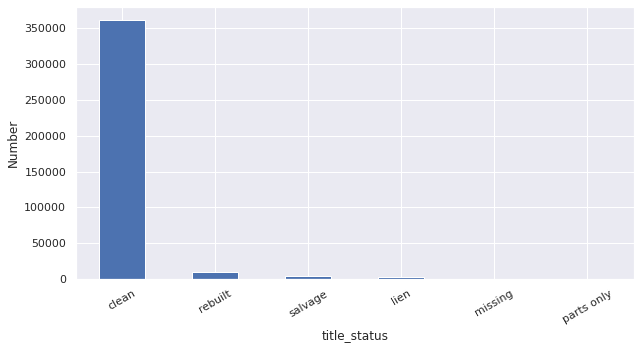

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel("title_status")
plt.ylabel("Number")
title_status = data[["title_status"]].query("title_status.notnull()", engine="python")["title_status"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Replacing missing values of "title_status" column with most popular value

In [10]:
data = data.fillna(value={ "title_status":"clean" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
odometer             0.000000
title_status         0.000000
fuel                 0.653105
transmission         0.802138
type                18.185655
drive               20.642976
paint_color         24.139568
cylinders           35.050856
condition           38.121188
size                66.504621

total rows count: 379112


#### Analysing missing values for "fuel" column

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

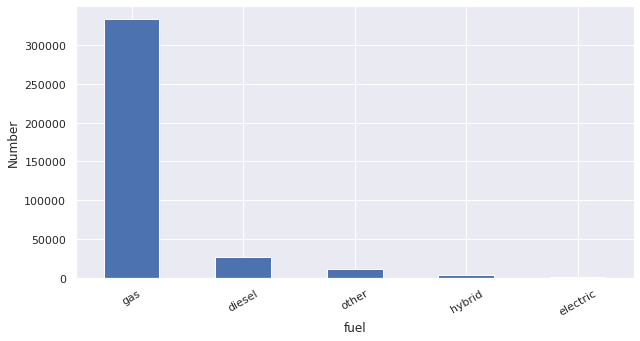

In [11]:
plt.figure(figsize=(10,5))
plt.xlabel("fuel")
plt.ylabel("Number")
title_status = data[["fuel"]].query("fuel.notnull()", engine="python")["fuel"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Replacing missing values of "fuel" column with most popular value

In [12]:
data = data.fillna(value={ "fuel":"gas" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.802138
type                18.185655
drive               20.642976
paint_color         24.139568
cylinders           35.050856
condition           38.121188
size                66.504621

total rows count: 379112


#### Analysing missing values for "transmission" column

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

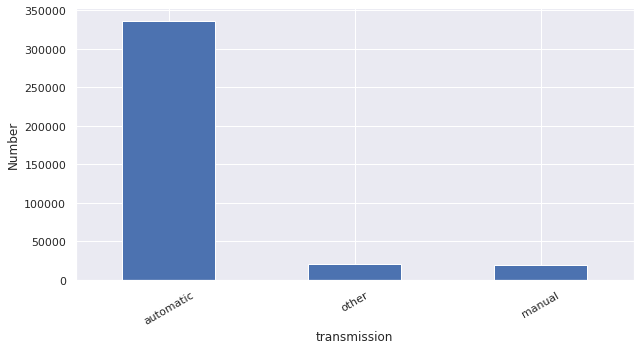

In [13]:
plt.figure(figsize=(10,5))
plt.xlabel("transmission")
plt.ylabel("Number")
title_status = data[["transmission"]].query("transmission.notnull()", engine="python")["transmission"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Replacing missing values of "transmission" column with most popular value

In [14]:
data = data.fillna(value={ "transmission":"automatic" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                18.185655
drive               20.642976
paint_color         24.139568
cylinders           35.050856
condition           38.121188
size                66.504621

total rows count: 379112


#### Analysing missing values for "condition" column

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

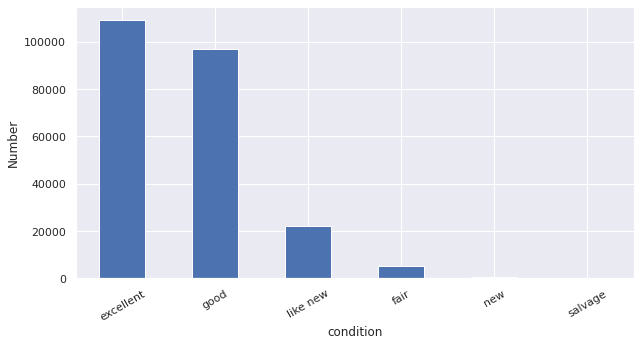

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel("condition")
plt.ylabel("Number")
title_status = data[["condition"]].query("condition.notnull()", engine="python")["condition"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Dropping "condition" column

In [16]:
data = data.drop(columns=['condition'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                18.185655
drive               20.642976
paint_color         24.139568
cylinders           35.050856
size                66.504621

total rows count: 379112


#### Analysing missing values for "paint_color" column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

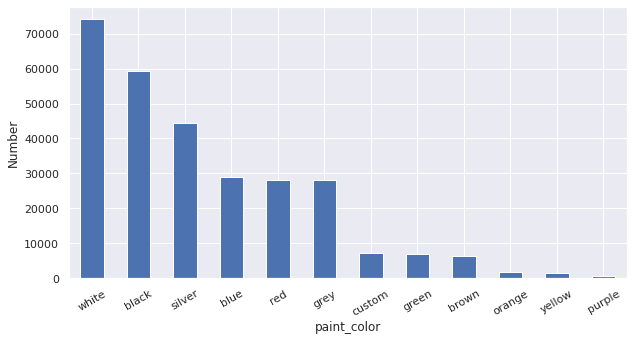

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel("paint_color")
plt.ylabel("Number")
title_status = data[["paint_color"]].query("paint_color.notnull()", engine="python")["paint_color"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "paint_color" column

In [18]:
data = data.drop(columns=['paint_color'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                18.185655
drive               20.642976
cylinders           35.050856
size                66.504621

total rows count: 379112


#### Analysing missing values for "cylinders" column

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

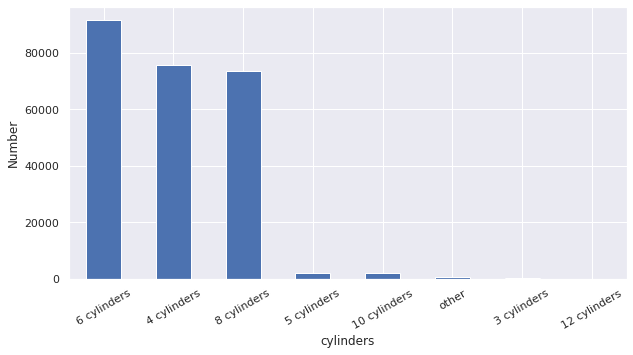

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel("cylinders")
plt.ylabel("Number")
title_status = data[["cylinders"]].query("cylinders.notnull()", engine="python")["cylinders"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "cylinders" column

In [20]:
data = data.drop(columns=['cylinders'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                18.185655
drive               20.642976
size                66.504621

total rows count: 379112


#### Analysing missing values for "drive" column

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

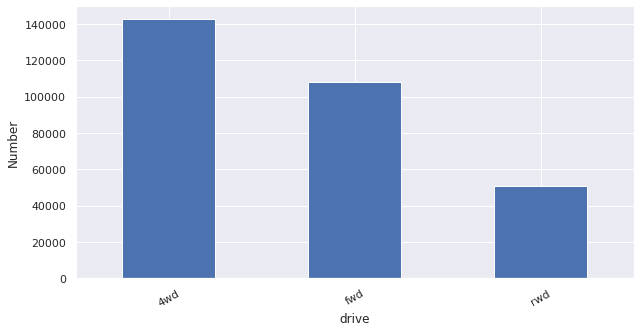

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel("drive")
plt.ylabel("Number")
title_status = data[["drive"]].query("drive.notnull()", engine="python")["drive"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "drive" column

In [22]:
data = data.drop(columns=['drive'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                18.185655
size                66.504621

total rows count: 379112


#### Analysing missing values for "type" column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

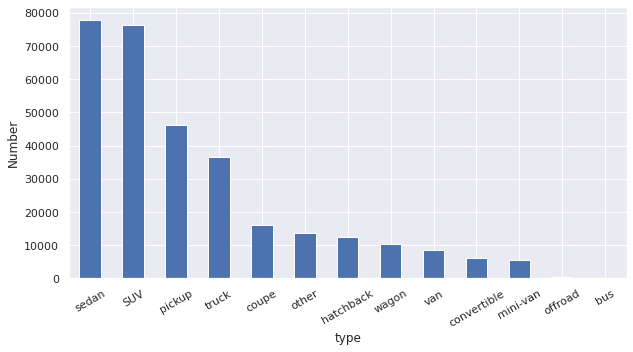

In [23]:
plt.figure(figsize=(10,5))
plt.xlabel("type")
plt.ylabel("Number")
title_status = data[["type"]].query("type.notnull()", engine="python")["type"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "type" column

In [24]:
data = data.drop(columns=['type'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
size                66.504621

total rows count: 379112


#### Analysing missing values for "size" column

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

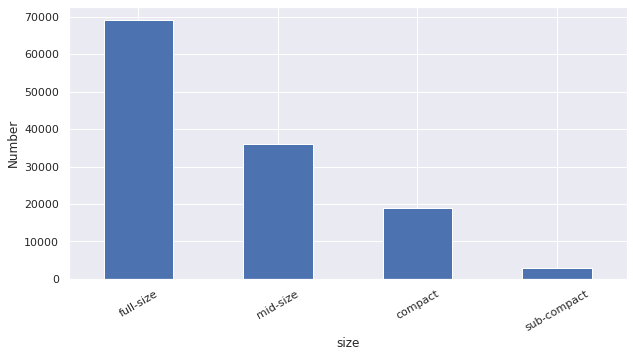

In [25]:
plt.figure(figsize=(10,5))
plt.xlabel("size")
plt.ylabel("Number")
title_status = data[["size"]].query("size.notnull()", engine="python")["size"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "size" column

In [26]:
data = data.drop(columns=['size'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                     0.0
year                      0.0
manufacturer              0.0
model                     0.0
fuel                      0.0
odometer                  0.0
title_status              0.0
transmission              0.0

total rows count: 379112


### Exploratory data analysis

#### Exploring  relationship between odometer and price

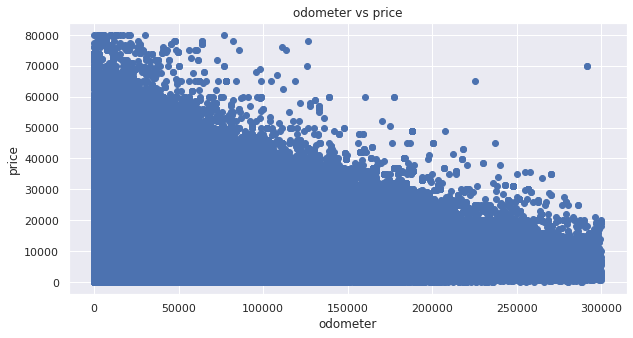

In [27]:
plt.figure(figsize=(10,5))
plt.title("odometer vs price")
plt.xlabel("odometer")
plt.ylabel("price")
plt.scatter(data["odometer"], data["price"])
plt.show()

#### Exploring  relationship between year and price

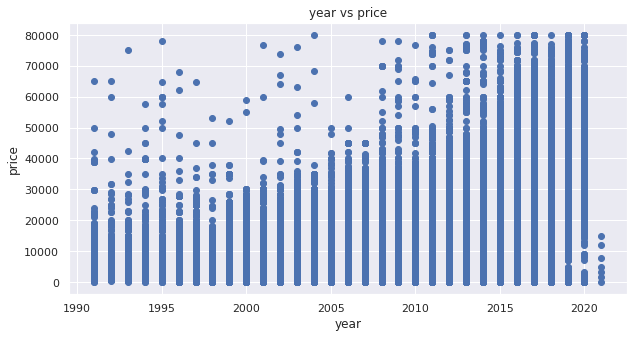

In [28]:
plt.figure(figsize=(10,5))
plt.title("year vs price")
plt.xlabel("year")
plt.ylabel("price")
plt.scatter(data["year"], data["price"])
plt.show()

#### Exploring  distribution of cars by "manufacturer"

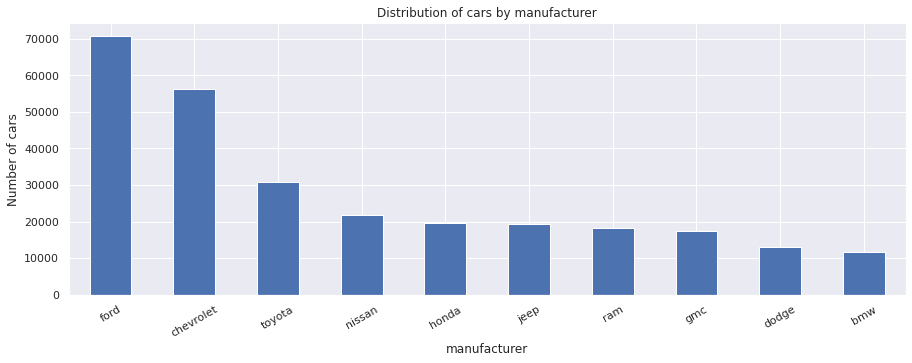

In [29]:
plt.figure(figsize=(15,5))
plt.title("Distribution of cars by manufacturer")
plt.xlabel("manufacturer")
plt.ylabel("Number of cars")
manufacturer_distribution = data["manufacturer"].value_counts()
manufacturer_distribution[0:10].plot(kind="bar")
plt.xticks(rotation=30)
plt.show()

#### Removing "price" column detected outliers

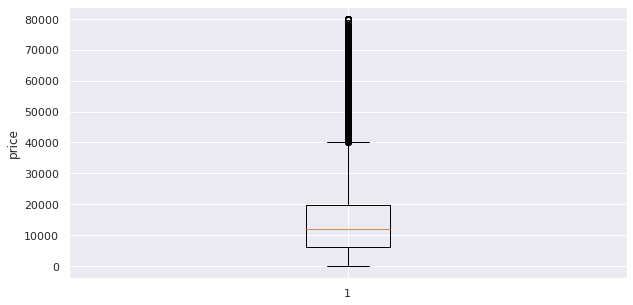

In [30]:
plt.figure(figsize=(10,5))
plt.ylabel("price")
plt.boxplot(data["price"])
plt.show()

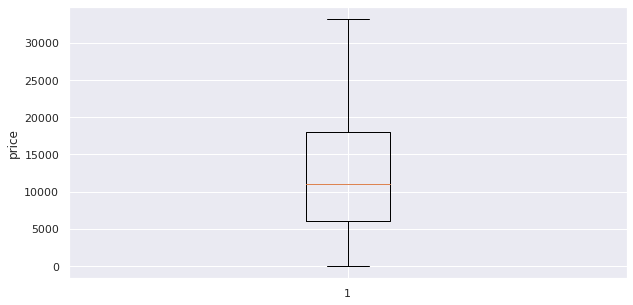

rows: 356939


In [31]:
data = reject_outliers(data, "price")

plt.figure(figsize=(10,5))
plt.ylabel("price")
plt.boxplot(data["price"])
plt.show()
print("rows: " + str(data.shape[0]))

#### Saving clean data into file

In [32]:
manual_test_data = data.sample(n = 100) 
manual_test_data.to_csv('clean_data_chunk.csv', mode='w', header=True)

## Applying machine learning models

### Pre-processing the data

#### Label encoding

In [33]:
from sklearn import preprocessing

manufacturer_label_encoder = preprocessing.LabelEncoder()
model_label_encoder = preprocessing.LabelEncoder()
manufacturer_label_encoder.fit(data[["manufacturer"]])
model_label_encoder.fit(data[["model"]])
fuel_category_dict = {"gas":0, "diesel":1, "other":2, "hybrid":3, "electric":4}
transmission_category_dict = {"automatic":0, "other":1, "manual":2}
title_status_category_dict = {"clean":0, "rebuilt":1, "salvage":2, "lien":3, "missing":4, "parts only":5}
fuel_category_inv_dict = {0:"gas", 1:"diesel", 2:"other", 3:"hybrid", 4:"electric"}
transmission_category_inv_dict = {0:"automatic", 1:"other", 2:"manual"}
title_status_category_inv_dict = {0:"clean", 1:"rebuilt", 2:"salvage", 3:"lien", 4:"missing", 5:"parts only"}

print(data.head(5))
print("\n")

data[["manufacturer"]] = manufacturer_label_encoder.transform(data[["manufacturer"]])
data[["model"]] = model_label_encoder.transform(data[["model"]])
data["fuel"] = data["fuel"].map(fuel_category_dict)
data["transmission"] = data["transmission"].map(transmission_category_dict)
data["title_status"] = data["title_status"].map(title_status_category_dict)

print(data.head(5))
print("\n")

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   price    year manufacturer     model fuel  odometer title_status  \
0  10299  2012.0        acura        tl  gas   90186.0        clean   
2   9500  2011.0       jaguar        xf  gas   85000.0        clean   
3   3995  2004.0        honda   element  gas  212526.0        clean   
5  12995  2015.0          kia  sportage  gas   85127.0        clean   
6  10995  2014.0    chevrolet  traverse  gas  112383.0        clean   

  transmission  
0    automatic  
2    automatic  
3    automatic  
5    automatic  
6    automatic  


   price    year  manufacturer  model  fuel  odometer  title_status  \
0  10299  2012.0             0  19203     0   90186.0             0   
2   9500  2011.0            18  20985     0   85000.0             0   
3   3995  2004.0            15   7182     0  212526.0             0   
5  12995  2015.0            20  18090     0   85127.0             0   
6  10995  2014.0             7  19606     0  112383.0             0   

   transmission  
0             0  
2     

#### Label de-coding

In [34]:
#data[["manufacturer"]] = manufacturer_label_encoder.inverse_transform(data[["manufacturer"]])
#data[["model"]] = model_label_encoder.inverse_transform(data[["model"]])
#data["fuel"] = data["fuel"].map(fuel_category_inv_dict)
#data["transmission"] = data["transmission"].map(transmission_category_inv_dict)
#data["title_status"] = data["title_status"].map(title_status_category_inv_dict)

#print(data.head(5))
#print("\n")

#### Scaling data

In [35]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaler.fit(data.drop("price", axis=1))
y_scaler.fit(data[["price"]])
print(data.head(5))
data[data.drop("price", axis=1).columns] = pd.DataFrame(X_scaler.transform(data.drop("price", axis=1)), index=data.drop("price", axis=1).index, columns=data.drop("price", axis=1).columns)
data[["price"]] = pd.DataFrame(y_scaler.transform(data[["price"]]), index=data[["price"]].index, columns=data[["price"]].columns)
print(data.head(5))

   price    year  manufacturer  model  fuel  odometer  title_status  \
0  10299  2012.0             0  19203     0   90186.0             0   
2   9500  2011.0            18  20985     0   85000.0             0   
3   3995  2004.0            15   7182     0  212526.0             0   
5  12995  2015.0            20  18090     0   85127.0             0   
6  10995  2014.0             7  19606     0  112383.0             0   

   transmission  
0             0  
2             0  
3             0  
5             0  
6             0  
      price      year  manufacturer     model  fuel  odometer  title_status  \
0  0.310190  0.700000      0.000000  0.896750   0.0  0.300595           0.0   
2  0.286123  0.666667      0.461538  0.979966   0.0  0.283308           0.0   
3  0.120305  0.433333      0.384615  0.335388   0.0  0.708412           0.0   
5  0.391397  0.800000      0.512821  0.844774   0.0  0.283731           0.0   
6  0.331155  0.766667      0.179487  0.915569   0.0  0.374588         

#### Inverse scaling data

In [36]:
#data[data.drop("price", axis=1).columns] = pd.DataFrame(X_scaler.inverse_transform(data.drop("price", axis=1)), index=data.drop("price", axis=1).index, columns=data.drop("price", axis=1).columns)
#data[["price"]] = pd.DataFrame(y_scaler.inverse_transform(data[["price"]]), index=data[["price"]].index, columns=data[["price"]].columns)

#print(data.head(5))

#### Shuffling

In [37]:
from sklearn.utils import shuffle
data = shuffle(data)

### Using "Decision tree regressor" model for the "decision tree" demonstration

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from IPython.display import Image
from sklearn.externals.six import StringIO  
#import pydotplus

#X = data[0:100].drop("price", axis=1)
#y = data[0:100]["price"]
#features = list(X.columns)

#dtr = tree.DecisionTreeRegressor(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#dtr = dtr.fit(X_train, y_train)

#dot_data = StringIO()
#tree.export_graphviz(dtr, out_file=dot_data, feature_names=features)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Using "Random forest regressor" model

#### Estimating accuracy

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X = data.drop("price", axis=1)
y = data["price"]
rfr = RandomForestRegressor(n_estimators=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rfr.fit(X_train,y_train)
rfr_predict = rfr.predict(X_test)
print("MAE (Mean Absolute Error): " + str(mean_absolute_error(y_test, rfr_predict)))
print("MSE (Mean Squared Error): " + str(mean_squared_error(y_test, rfr_predict)))

#scores = cross_val_score(rfr, X, y, cv=10)
#print("Cross validation score: " + str(scores.mean()))


MAE (Mean Absolute Error): 0.045833071342748506
MSE (Mean Squared Error): 0.007550975893335521


#### Checking for feature importance


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

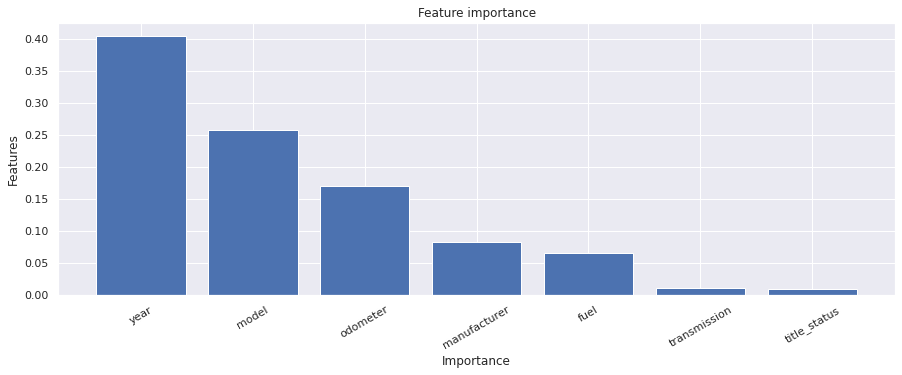

In [40]:

feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False
                                  )

plt.figure(figsize=(15,5))
plt.title("Feature importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.bar(feature_importances["importance"].index, feature_importances["importance"])
plt.xticks(rotation=30)

### Manual test

In [41]:
import json
inp = manual_test_data[21:22]

inp_cols = inp.columns.tolist()
inp_vals = inp.values[0]
inp_dict = {inp_cols[1]:inp_vals[1],inp_cols[2]:inp_vals[2],inp_cols[3]:inp_vals[3],inp_cols[4]:inp_vals[4],inp_cols[5]:inp_vals[5],inp_cols[6]:inp_vals[6],inp_cols[7]:inp_vals[7]}
print(inp_dict)
print("Actual price: " + str(inp_vals[0]))
inp_json = json.dumps(inp_dict) # json string
inp_json = json.loads(inp_json) # dictionary
X_values = pd.DataFrame([inp_json])

X_values[["manufacturer"]] = manufacturer_label_encoder.transform(X_values[["manufacturer"]])
X_values[["model"]] = model_label_encoder.transform(X_values[["model"]])
X_values["fuel"] = X_values["fuel"].map(fuel_category_dict)
X_values["transmission"] = X_values["transmission"].map(transmission_category_dict)
X_values["title_status"] = X_values["title_status"].map(title_status_category_dict)

X_values = pd.DataFrame(X_scaler.transform(X_values), index=X_values.index, columns=X_values.columns)
rfr_predict = rfr.predict(X_values)
y_value = y_scaler.inverse_transform([rfr_predict])
print("Predicted price: " + str(y_value[0][0]))


{'year': 2014.0, 'manufacturer': 'ram', 'model': '2500 4x4', 'fuel': 'gas', 'odometer': 88837.0, 'title_status': 'clean', 'transmission': 'automatic'}
Actual price: 18995
Predicted price: 19663.36111111111


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Preparing for deployment

#### Serializing

In [42]:
import pickle

pickle.dump(rfr, open('rfr.pkl','wb'))
pickle.dump(manufacturer_label_encoder, open('manufacturer_label_encoder.pkl','wb'))
pickle.dump(model_label_encoder, open('model_label_encoder.pkl','wb'))
pickle.dump(X_scaler, open('x_scaler.pkl','wb'))
pickle.dump(y_scaler, open('y_scaler.pkl','wb'))



#### De-serializing

In [43]:
rfr = pickle.load(open('rfr.pkl','rb'))
manufacturer_label_encoder = pickle.load(open('manufacturer_label_encoder.pkl','rb'))
model_label_encoder = pickle.load(open('model_label_encoder.pkl','rb'))
X_scaler = pickle.load(open('x_scaler.pkl','rb'))
y_scaler = pickle.load(open('y_scaler.pkl','rb'))

rfr_predict = rfr.predict(X_values)
y_value = y_scaler.inverse_transform([rfr_predict])
print("Predicted price: " + str(y_value[0][0]))



Predicted price: 19663.36111111111
